In [1]:
import random
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil
import sklearn

# Video Game Prep

In [2]:
video_games = pd.read_csv("Video_Games.csv") # Most updated one I could find (2 months)
video_games.head()

df = pd.DataFrame(video_games)
df_game = df.copy()

In [7]:
video_games


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
video_games_des = video_games.describe()
print(video_games.describe(), video_games.info())
#video_games_des

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
       Year

In [9]:
rating_count = df_game['Name'].where(df_game['Critic_Score'] > 70).count()
print(rating_count)
print(df_game['Name'].where(df_game['Critic_Score'] > 70))


4119
0               Wii Sports
1                      NaN
2           Mario Kart Wii
3        Wii Sports Resort
4                      NaN
               ...        
16714                  NaN
16715                  NaN
16716                  NaN
16717                  NaN
16718                  NaN
Name: Name, Length: 16719, dtype: object


# Data Prep: Game Genres

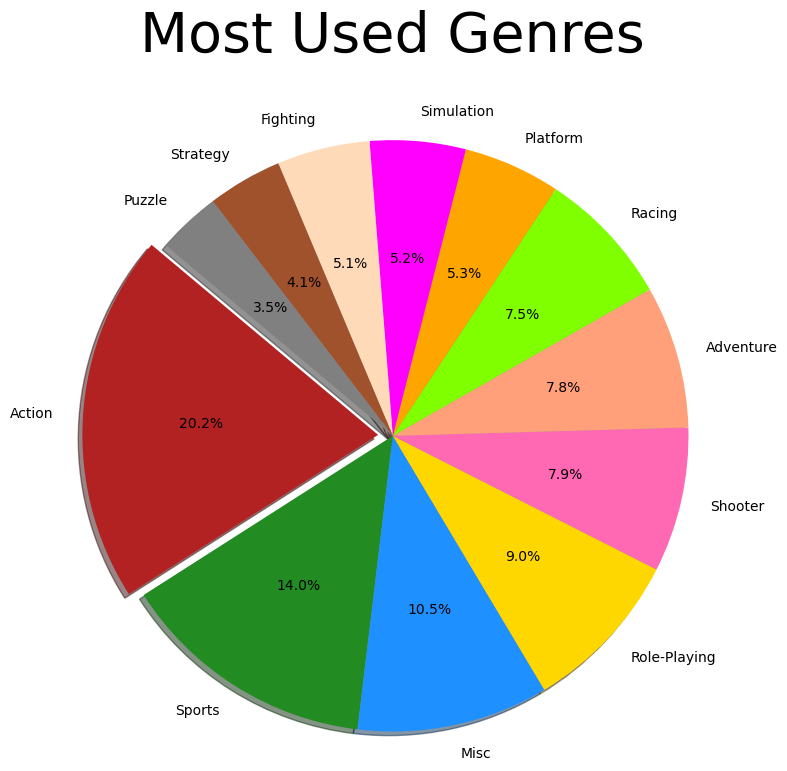

Genre Amount:
 


Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [19]:
gen_amount = df_game['Genre'].value_counts()
colors = ("firebrick", "forestgreen","dodgerblue", "gold", "hotpink", "lightsalmon", "chartreuse", "orange","magenta", "peachpuff", "sienna", "gray")
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
gen_label = 'Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'
plt.pie(gen_amount, colors=colors, explode = explode, labels = gen_label,
autopct='%1.1f%%', shadow=True, startangle=140, radius = 2)
plt.title("Most Used Genres\n"+" \n"+" \n"+" ", fontsize = 40)
plt.show()
print('Genre Amount:')
print(" ")
df_game['Genre'].value_counts()

# Data Prep: Game Count

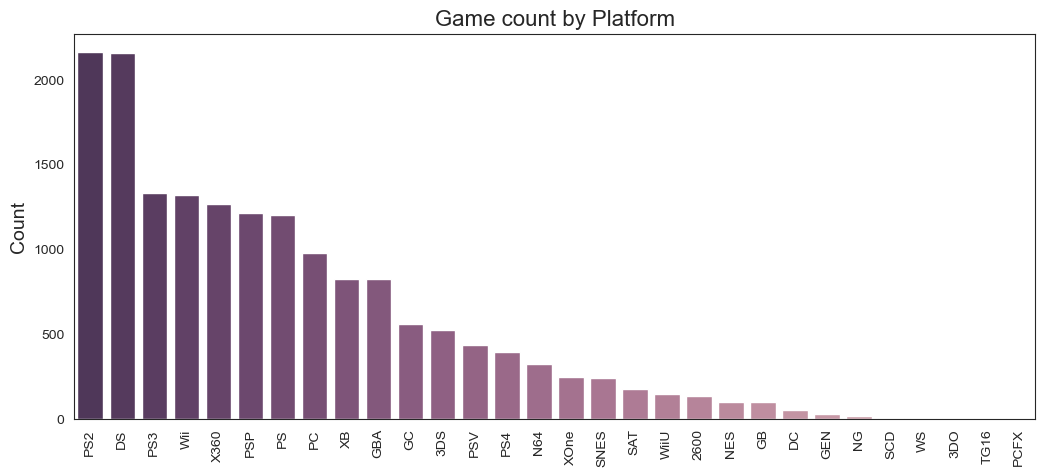

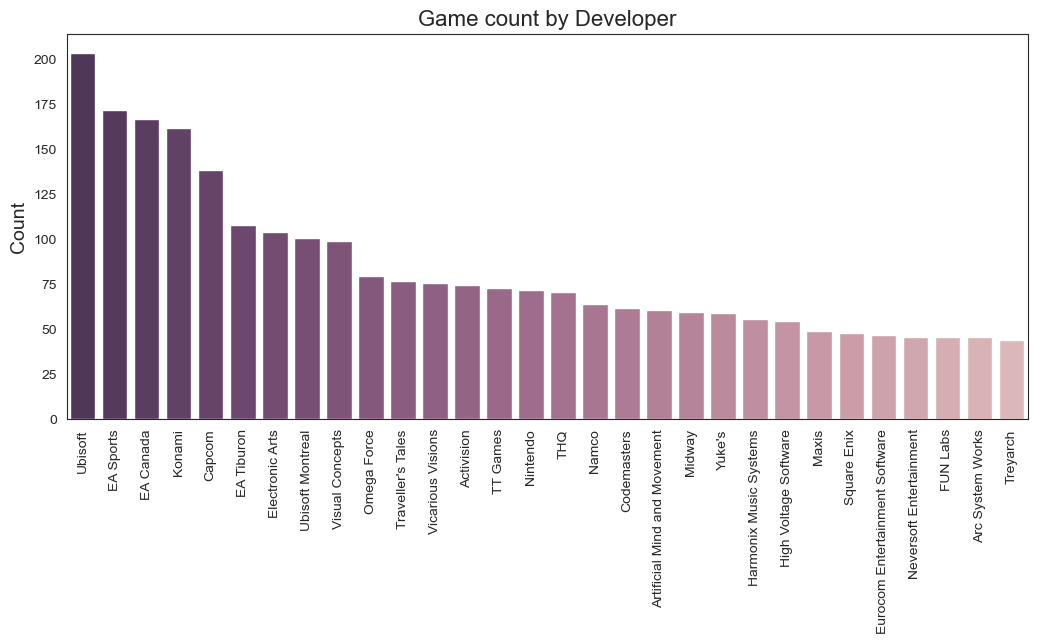

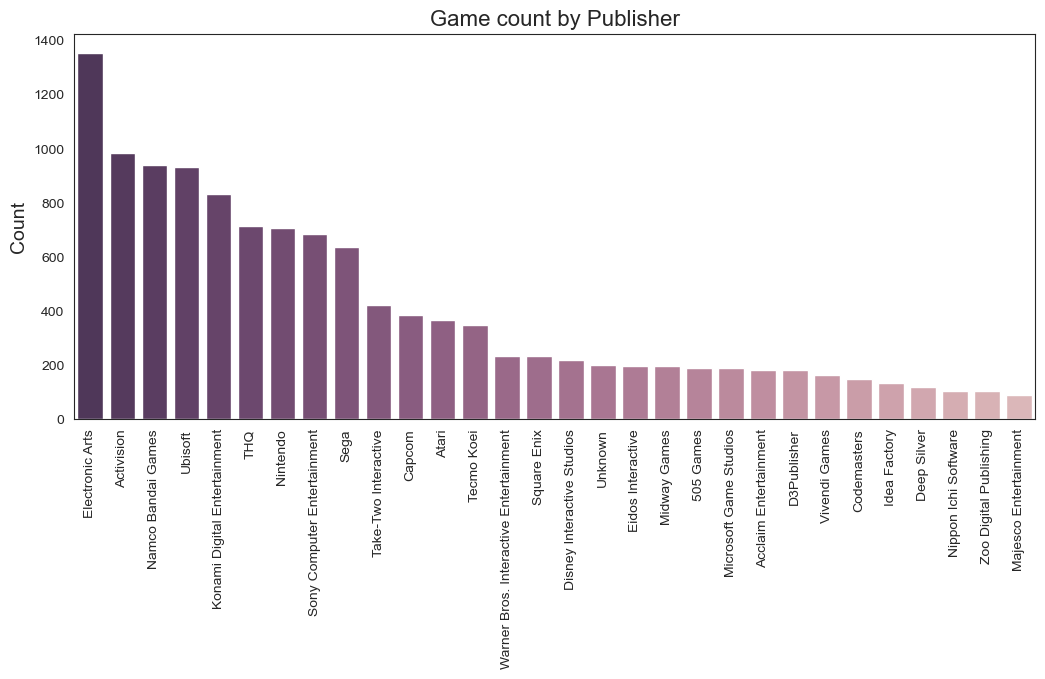

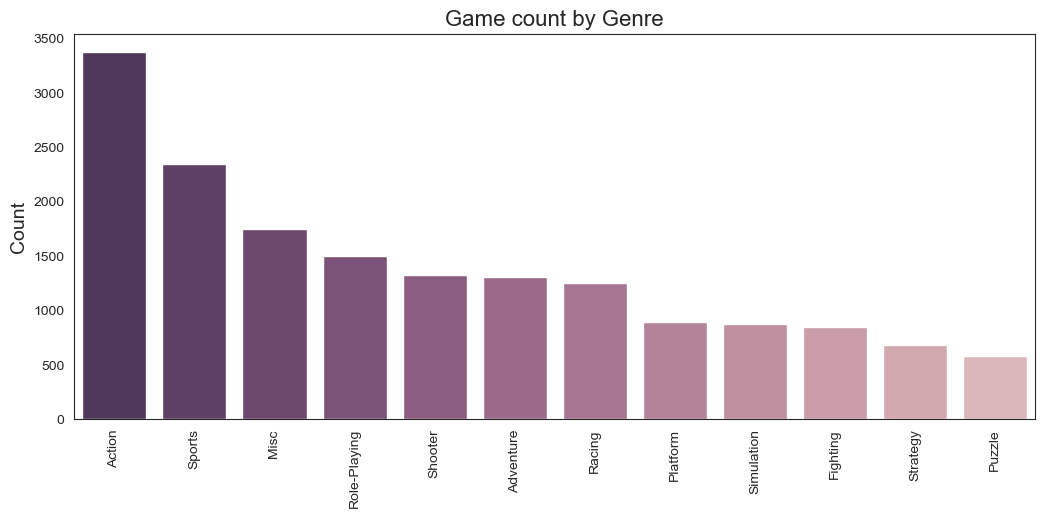

In [20]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre']

for col in cols:
    chart = df_game[  ['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.25, light=.75, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

# Data Prep: Viewing Sales

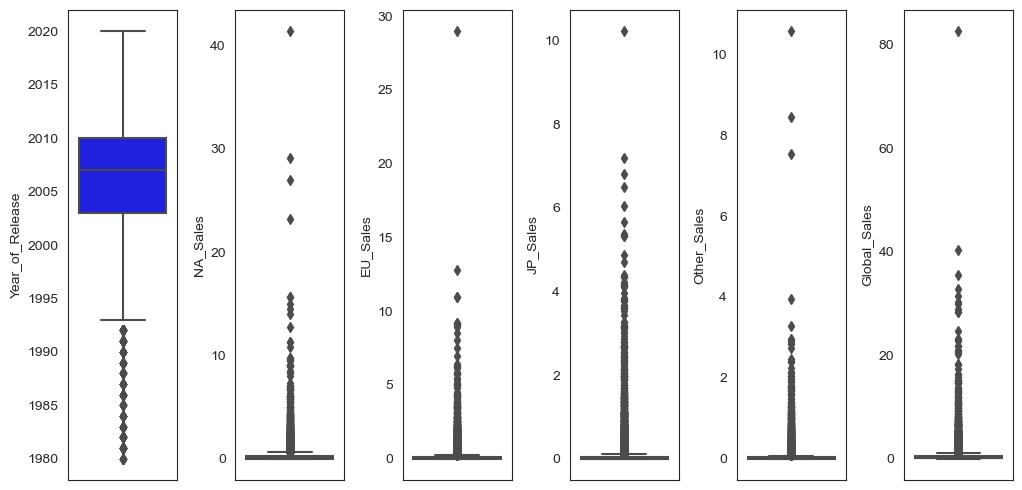

In [21]:
features = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_game[features[i]],color='blue',orient='v')
    plt.tight_layout()

# Filling missing values

In [22]:
df_game.isnull().sum().sort_values(ascending=False)[:10]

User_Count         9129
Critic_Score       8582
Critic_Count       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Name                  2
Genre                 2
dtype: int64

In [23]:
i_missing = np.where(df_game.isna())[0]
df_game.iloc[i_missing, :]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("This will fill missing values with the mean of the data:")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

imputer = imputer.fit_transform(df_game) 
dfauto_freq = pd.DataFrame(imputer)


display(dfauto_freq)
np.any(dfauto_freq.isna())

This will fill missing values with the mean of the data:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,70.0,4.0,tbd,4.0,Ubisoft,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,70.0,4.0,tbd,4.0,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.0,0.0,0.01,0.0,0.01,70.0,4.0,tbd,4.0,Ubisoft,E
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.0,0.01,0.0,0.0,0.01,70.0,4.0,tbd,4.0,Ubisoft,E
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.0,0.0,0.01,0.0,0.01,70.0,4.0,tbd,4.0,Ubisoft,E
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01,70.0,4.0,tbd,4.0,Ubisoft,E


False

In [25]:
test_t = df_game['Name'].where(df_game['Critic_Score'] > 70)
test_t.count()

4119

# Predicting Hit Games (sales > 1 million)

In [72]:
df_names = df_game[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df_names = df_names.dropna().reset_index(drop=True)
df_hits = df_names[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df_hits['Hit'] = df_hits['Global_Sales']
df_hits.drop('Global_Sales', axis=1, inplace=True)

df_test = df_names.copy()

In [73]:

def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df_hits['Hit'] = df_hits['Hit'].apply(lambda x: hit(x))

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [75]:
#df_hits[:5]
df_hits[:50]
#df_hits[:100]

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2006.0,76.0,1
1,Wii,Racing,Nintendo,2008.0,82.0,1
2,Wii,Sports,Nintendo,2009.0,80.0,1
3,DS,Platform,Nintendo,2006.0,89.0,1
4,Wii,Misc,Nintendo,2006.0,58.0,1
5,Wii,Platform,Nintendo,2009.0,87.0,1
6,DS,Racing,Nintendo,2005.0,91.0,1
7,Wii,Sports,Nintendo,2007.0,80.0,1
8,X360,Misc,Microsoft Game Studios,2010.0,61.0,1
9,Wii,Sports,Nintendo,2009.0,80.0,1


In [76]:
from pandas import get_dummies
df_copy = pd.get_dummies(df_hits)
df_copy[:5]

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Refernce: https://www.kaggle.com/code/ignacioch/predicting-vg-hits-1-million-sales-with-lr-rfc/notebook?scriptVersionId=0
df_hits_copy = df_copy
y = df_hits_copy['Hit'].values
df_hits_copy = df_hits_copy.drop(['Hit'],axis=1)
X = df_hits_copy.values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

# Predicting with Random Forest Classifiers

In [79]:
rnd_forest = RandomForestClassifier(random_state=2).fit(X_train, y_train)
y_predict = rnd_forest.predict_proba(X_test)
print("Validation accuracy: ", sum(pd.DataFrame(y_predict).idxmax(axis=1).values == y_test)/len(y_test))

Validation accuracy:  0.8537938439513243


# Predicting with Logistic Regression

In [80]:
log_reg = LogisticRegression().fit(X_train, y_train)
log_pred = log_reg.predict_proba(X_test)
print("Validation accuracy: ", sum(pd.DataFrame(log_pred).idxmax(axis=1).values
                                   == y_test)/len(y_test))

Validation accuracy:  0.85773085182534


In [81]:
all_predictions = log_reg.predict(X_test)
print(classification_report(y_test, all_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4632
           1       0.66      0.35      0.45       956

    accuracy                           0.86      5588
   macro avg       0.77      0.65      0.69      5588
weighted avg       0.84      0.86      0.84      5588



# Decision Tree Classifiers

In [82]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=0)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


Train Accuracy: 0.9969929836284664, Test Accuracy: 0.8191382765531062


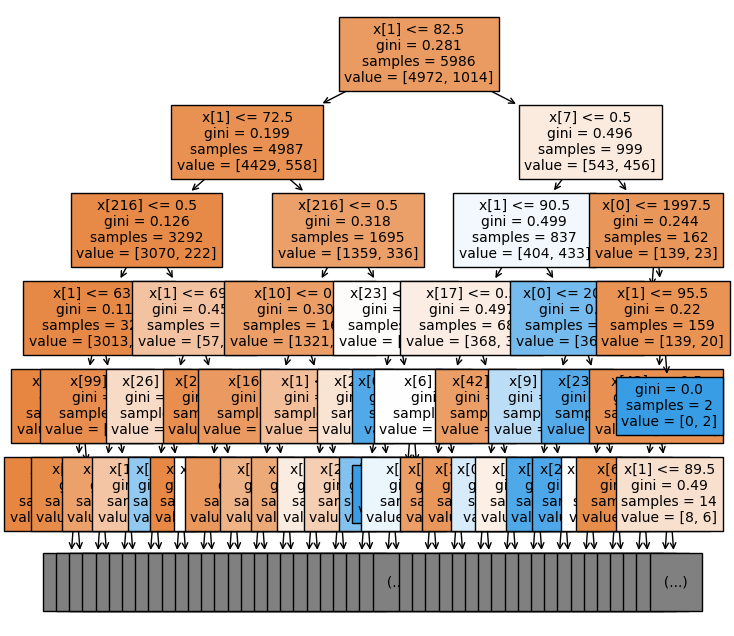

In [83]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
#reeplot = plot_tree(model, filled=True)
treeplot = plot_tree(model, filled=True, max_depth = 5, fontsize = 10)

# Calculating games that can still become hits

In [84]:
not_hit = df_copy[df_copy['Hit'] == 0]

In [85]:
# Refernce: https://www.kaggle.com/code/ignacioch/predicting-vg-hits-1-million-sales-with-lr-rfc/notebook?scriptVersionId=0
not_hit_copy = not_hit
y = not_hit_copy['Hit'].values
not_hit_copy = not_hit_copy.drop(['Hit'], axis = 1)
X = not_hit_copy.values

pred = log_reg.predict_proba(X)
df_names = df_names[df_names['Global_Sales'] < 1] # < 1 means not a hit
df_names['Hit_Probability'] = pred[:,1]

In [86]:
df_names = df_names[df_names['Year_of_Release'] == 2016] # 2015
df_names.sort_values(['Hit_Probability'], ascending=[False], inplace = True)
df_names = df_names[['Name', 'Platform', 'Hit_Probability']]

# Top 10 games with highest proability of becoming hits

In [87]:
df_names[:10].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,Final Fantasy XIV: Heavensward,PS4,0.744349
1,Xenoblade Chronicles X,WiiU,0.736214
2,Art Academy: Home Studio,WiiU,0.715967
3,Shovel Knight,PS4,0.703744
4,Bravely Second: End Layer,3DS,0.648161
5,Borderlands: The Handsome Collection,PS4,0.638632
6,Skylanders: SuperChargers,PS4,0.592620
7,Metal Gear Solid V: The Phantom Pain,XOne,0.576418
8,Tearaway Unfolded,PS4,0.576007
9,The Talos Principle,PS4,0.540830


# Top 10 games with lowest probability of becoming hits

In [88]:
df_names[:-11:-1].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,Rugby 15,XOne,0.000195
1,Rugby 15,PS4,0.000305
2,Rugby World Cup 2015,PS4,0.000907
3,Grand Ages: Medieval,PC,0.001557
4,War for the Overworld,PC,0.001712
5,F1 2015,PC,0.001796
6,Tony Hawk's Pro Skater 5,PS4,0.002278
7,Tony Hawk's Pro Skater 5,XOne,0.002897
8,MX vs. ATV Supercross Encore,XOne,0.003189
9,Act of Aggression,PC,0.003673


# Conclusion

Logistic Regression produced the highest accuracy between the 3 tested methods. The results were pretty conclusive though I think a lot more testing could be done. I feel like having a data set that has no missing values and is more current could make this project even better. I also think if a game takes multiple years to sell 1 million copies you could instead consider that not a hit. As well as take into account the cost of the game and other stuff. Overall I enjoyed doing this project and learned a lot of valuable things!